In [2]:
import sys
sys.path.insert(0, "/Users/do-hyungkwon/GoogleDrive/git/aiclass/1731095007_dohyungkwon/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math

%matplotlib inline
# pip install pygraphviz

In [3]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01, 
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01
)

In [4]:
# pip install pygraphviz
# n.draw_and_show(figsize=(20, 10))

In [5]:
#data = mnist.MNIST_Data()
data = mnist.Fashion_MNIST_Data()

In [10]:
forward_final_output = n.feed_forward(input_data=data.test_input)
#print(forward_final_output.shape)
print("Initial Accuracy", tff.accuracy(forward_final_output, data.test_target))

batch_size = 1000
# time
from timeit import default_timer as timer
s = timer()
n.learning(max_epoch=100, data=data, batch_size=batch_size, print_period=1, verbose=False)
e = timer()
print("JIT_SUM_1: {:7.6f} ms".format((e - s) * 1000))
# 수행시간을 어떻게든 줄인다. numba 파일을 이용하고, jit을 이용해서 어떻게든 줄인다.
# @git을 적절한 위치에 붙여야
# deep leraning network.py의 learning
# jit 어노테이션을 적절한 위치에 넣어야 한다.

forward_final_output = n.feed_forward(input_data=data.test_input)
print("Post-learning Accuracy", tff.accuracy(forward_final_output, data.test_target))

Initial Accuracy 0.8649
Epoch   0 Completed - Train Error: 0.314382 - Validation Error: 0.347915 - Test Accuracy: 0.864900
Epoch   1 Completed - Train Error: 0.353629 - Validation Error: 0.405835 - Test Accuracy: 0.845000
Epoch   2 Completed - Train Error: 0.324050 - Validation Error: 0.347173 - Test Accuracy: 0.866100
Epoch   3 Completed - Train Error: 0.371591 - Validation Error: 0.380436 - Test Accuracy: 0.854900
Epoch   4 Completed - Train Error: 0.291584 - Validation Error: 0.353124 - Test Accuracy: 0.864200
Epoch   5 Completed - Train Error: 0.402655 - Validation Error: 0.419928 - Test Accuracy: 0.840700
Epoch   6 Completed - Train Error: 0.318447 - Validation Error: 0.368075 - Test Accuracy: 0.857400
Epoch   7 Completed - Train Error: 0.300680 - Validation Error: 0.358350 - Test Accuracy: 0.862300
Epoch   8 Completed - Train Error: 0.305154 - Validation Error: 0.349313 - Test Accuracy: 0.863500
Epoch   9 Completed - Train Error: 0.353496 - Validation Error: 0.348440 - Test Accur

Epoch  83 Completed - Train Error: 1.324705 - Validation Error: 1.413196 - Test Accuracy: 0.456500
Epoch  84 Completed - Train Error: 0.985460 - Validation Error: 0.964712 - Test Accuracy: 0.639400
Epoch  85 Completed - Train Error: 0.995142 - Validation Error: 0.943933 - Test Accuracy: 0.651000
Epoch  86 Completed - Train Error: 1.031749 - Validation Error: 1.060302 - Test Accuracy: 0.580800
Epoch  87 Completed - Train Error: 0.952316 - Validation Error: 0.962431 - Test Accuracy: 0.624900
Epoch  88 Completed - Train Error: 0.840549 - Validation Error: 0.855020 - Test Accuracy: 0.631400
Epoch  89 Completed - Train Error: 1.072836 - Validation Error: 1.068686 - Test Accuracy: 0.568800
Epoch  90 Completed - Train Error: 0.921949 - Validation Error: 0.887872 - Test Accuracy: 0.685700
Epoch  91 Completed - Train Error: 0.918660 - Validation Error: 1.047632 - Test Accuracy: 0.637400
Epoch  92 Completed - Train Error: 0.638565 - Validation Error: 0.665627 - Test Accuracy: 0.715000
Epoch  93 

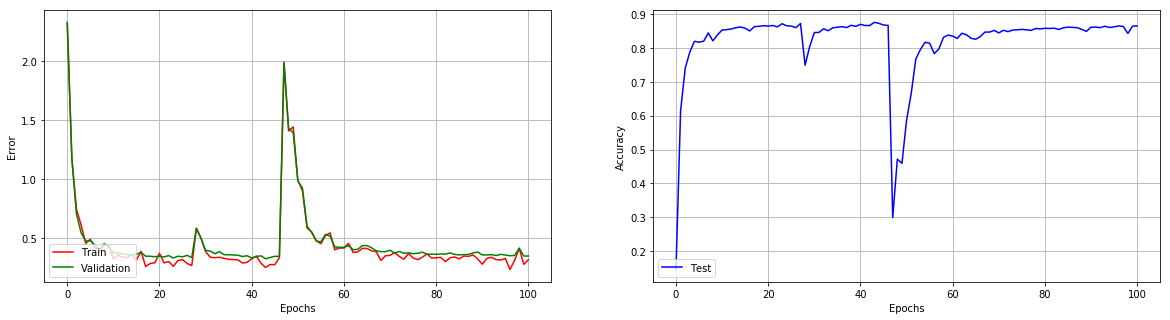

In [7]:
n.draw_error_values_and_accuracy(figsize=(20, 5))

False Prediction Index: 12, Prediction: sandal, Ground Truth: sneaker
False Prediction Index: 17, Prediction: pullover, Ground Truth: coat
False Prediction Index: 23, Prediction: sandal, Ground Truth: ankle_boots
False Prediction Index: 25, Prediction: pullover, Ground Truth: coat
False Prediction Index: 40, Prediction: t_shirt_top, Ground Truth: shirt


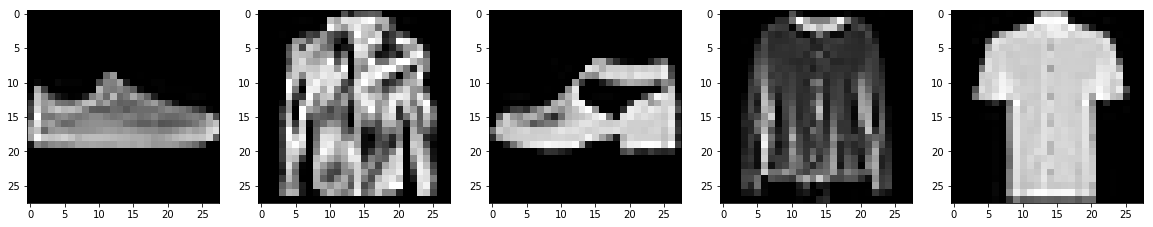

In [8]:
n.draw_false_prediction(data.test_input, data.test_target, data.labels, num=5, figsize=(20, 5))

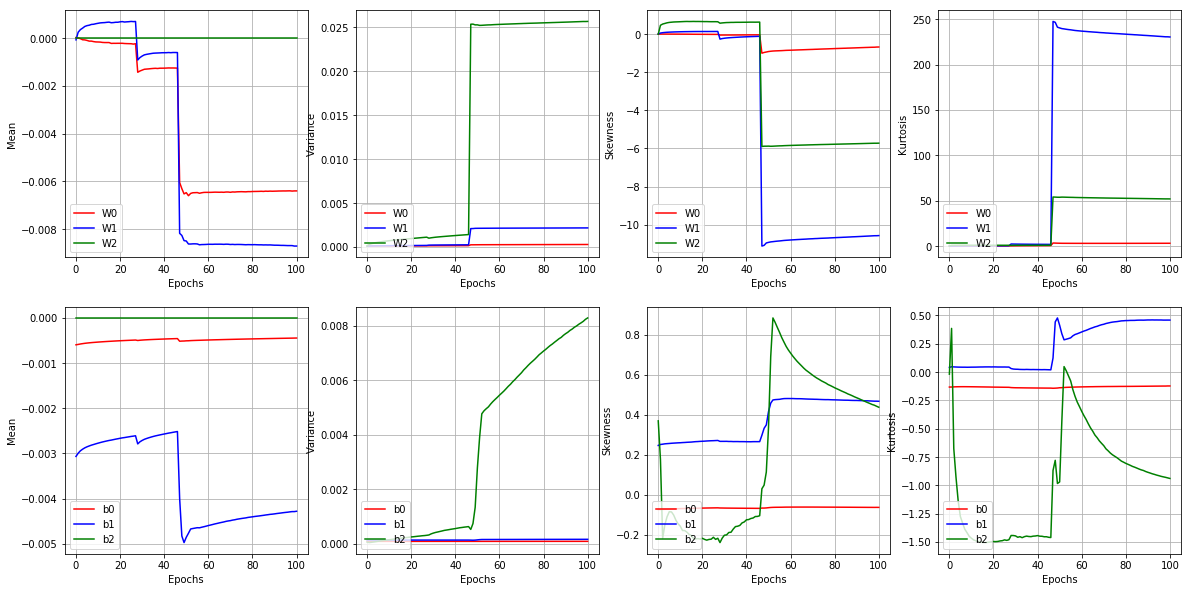

In [9]:
n.draw_param_description(figsize=(20, 10))

In [ ]:
# 계산(내가 짠 코드에서)을 잘못하고 있는건 아닌지.;예를 들면 로그연산에서 0값을 주면 안되는 등의 일을 고려하지 않았나..
